In [1]:
%%html
<style>
div.optional {
    display: block;
    background-color: #d7e2ff;
    border-color: #d7e2ff;
    border-left: 5px solid #d7e2ff;
    padding: 0.5em;
}
div.advanced {
    display: block;
    background-color: #fff4d7;
    border-color: #fff4d7;
    border-left: 5px solid #fff4d7;
    padding: 0.5em;
}
</style>

# ACSE-3 (Numerical Methods) <a class="tocSkip">

## Lecture 5: Time-stepping methods (numerical solution of IVPs) 1 <a class="tocSkip">
    
### Homework Exercises - Solutions <a class="tocSkip">

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Homework" data-toc-modified-id="Homework-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Homework</a></span><ul class="toc-item"><li><span><a href="#Homework---Stability-of-forward-Euler-applied-to-the-MSD-problem" data-toc-modified-id="Homework---Stability-of-forward-Euler-applied-to-the-MSD-problem-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Homework - Stability of forward Euler applied to the MSD problem</a></span><ul class="toc-item"><li><span><a href="#Solution---Stability-of-forward-Euler-applied-to-the-MSD-problem" data-toc-modified-id="Solution---Stability-of-forward-Euler-applied-to-the-MSD-problem-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Solution - Stability of forward Euler applied to the MSD problem</a></span></li></ul></li><li><span><a href="#Homework---Implement-improved-Euler-and-compare-with-forward-Euler" data-toc-modified-id="Homework---Implement-improved-Euler-and-compare-with-forward-Euler-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Homework - Implement improved Euler and compare with forward Euler</a></span><ul class="toc-item"><li><span><a href="#Solution---Implement-improved-Euler-and-compare-with-forward-Euler" data-toc-modified-id="Solution---Implement-improved-Euler-and-compare-with-forward-Euler-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Solution - Implement improved Euler and compare with forward Euler</a></span></li></ul></li><li><span><a href="#Homework---Lorenz-system" data-toc-modified-id="Homework---Lorenz-system-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Homework - Lorenz system</a></span><ul class="toc-item"><li><span><a href="#Solution---Lorenz-system" data-toc-modified-id="Solution---Lorenz-system-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Solution - Lorenz system</a></span></li></ul></li><li><span><a href="#Homework---Circular-orbits-[$\star$]" data-toc-modified-id="Homework---Circular-orbits-[$\star$]-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Homework - Circular orbits [$\star$]</a></span><ul class="toc-item"><li><span><a href="#Solution---Circular-orbits" data-toc-modified-id="Solution---Circular-orbits-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>Solution - Circular orbits</a></span></li></ul></li><li><span><a href="#Homework---Planetary-motion-(the-two-body-problem-or-Kepler's-problem)--[$\star\star$]" data-toc-modified-id="Homework---Planetary-motion-(the-two-body-problem-or-Kepler's-problem)--[$\star\star$]-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Homework - Planetary motion (the two-body problem or Kepler's problem)  [$\star\star$]</a></span><ul class="toc-item"><li><span><a href="#Solution---Planetary-motion-(the-two-body-problem-or-Kepler's-problem)" data-toc-modified-id="Solution---Planetary-motion-(the-two-body-problem-or-Kepler's-problem)-1.5.1"><span class="toc-item-num">1.5.1&nbsp;&nbsp;</span>Solution - Planetary motion (the two-body problem or Kepler's problem)</a></span></li></ul></li><li><span><a href="#Homework---A-ballistics-example-(the-shooting-method)--[$\star\star$]" data-toc-modified-id="Homework---A-ballistics-example-(the-shooting-method)--[$\star\star$]-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Homework - A ballistics example (the shooting method)  [$\star\star$]</a></span><ul class="toc-item"><li><span><a href="#Solution---A-ballistics-example-(the-shooting-method)" data-toc-modified-id="Solution---A-ballistics-example-(the-shooting-method)-1.6.1"><span class="toc-item-num">1.6.1&nbsp;&nbsp;</span>Solution - A ballistics example (the shooting method)</a></span></li></ul></li></ul></li></ul></div>

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
# the following allows us to plot triangles indicating convergence order
from mpltools import annotation

from matplotlib import rcParams
# font sizes for plots
plt.rcParams['font.size'] = 12
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial', 'Dejavu Sans']

# Homework

## Homework - Stability of forward Euler applied to the MSD problem

Implement a forward Euler time-stepping function.

Hint:  your solution might look something like (you need to fill in some gaps):

```Python
def forward_euler(f, y0, t0, t_max, dt):
    """ Forward Euler time-stepper.
    f = f(t,y) is the RHS function.
    y0 is the initial condition.
    t0 is the initial time; t_max is the end time.
    dt is the time step size.
    """ 
    y = np.array(y0)
    t = np.array(t0)
    y_all = [y0]
    t_all = [t0]
    while t < t_max:
        y = ........
        y_all.append(y)
        t = ........
        t_all.append(t)
    return np.array(y_all), np.array(t_all)
```


Run the forward Euler method on the MSD problem from class with the physical and numerical parameters considered in our stability analysis and plots in section 9.2, and plot the solutions obtained, confirming whether you see stability or instability behaviour which is consistent with our plots from the lecture which showed red dots wither being inside or outside the stability region.

### Solution - Stability of forward Euler applied to the MSD problem

Here we implement a solver and a function for MSD. First we check it gives the same plot as in the lecture (note the "eyeball norm" is a weak norm to use for code verification and you should do this more rigorously by directly comparing code output).

Then we see what happens in the cases of the physical/numerical parameters given in the lecture.

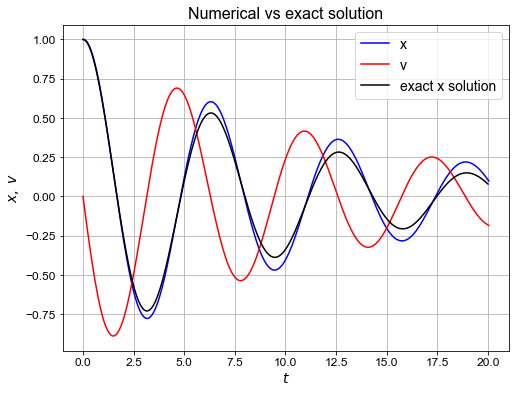

In [3]:
def forward_euler(f, y0, t0, t_max, dt):
    """ Forward Euler time-stepper.
    f = f(t,y) is the RHS function.
    y0 is the initial condition.
    t0 is the initial time; t_max is the end time.
    dt is the time step size.
    """ 
    y = np.array(y0)
    t = np.array(t0)
    y_all = [y0]
    t_all = [t0]
    while t < t_max:
        y = y + dt*f(t, y)  # euler guess
        y_all.append(y)
        t = t + dt
        t_all.append(t)
    return np.array(y_all), np.array(t_all)

def f_msd(t, y):
    """ RHS function for mass-spring-damper problem.
    
    y for MSD is the vector [x, v]
    """
    f = np.zeros_like(y)
    f[0] = y[1]
    f[1] = -2.*zeta*om0*y[1] - om0**2 * y[0]
# NB. could write this as A*y with
# A = np.matrix([[0, 1], [-om0**2, -2*zeta*om0]])
    return f

# Let's first check this against the implementation from class - eyeball norm a plot

# numerical parameters for problem
om0 = 1
zeta = 0.1
# initial data (we need two for this coupled problem)
x0 = 1
v0 = 0
# simulation period and time step size
t0 = 0.
tf = 20.
dt = 0.04

# initial condition
y0 = np.array([x0, v0])
yall, tall = forward_euler(f_msd, y0, t0, tf, dt)


# pull out the individual solution vectors (don't need to do this)
x = yall[:, 0]
v = yall[:, 1]

fig = plt.figure(figsize=(8, 6))
ax1 = plt.subplot(111)
ax1.plot(tall, x, 'b', label='x')
ax1.plot(tall, v, 'r', label='v')
ax1.set_xlabel(r'$t$', fontsize=14)
ax1.set_ylabel(r'$x,\; v$', fontsize=14)
ax1.set_title('Numerical vs exact solution', fontsize=16)
ax1.grid(True)


def x_exact(t):
    # the exact solution to the x component of the problem
    om = om0 * np.sqrt(1-zeta**2)
    x_exact = (np.exp(-zeta*om0*t)*(x0*np.cos(om*t) +
                                    (zeta*x0+v0/om0)*((om0/om)**2)*np.sin(om*t)))
    return x_exact


tfine = np.arange(0, tf, dt/100)
ax1.plot(tfine, x_exact(tfine), 'k', label='exact x solution')
# note we could easily compute and plot the exact v solution as well, we don't just so the plot doesn't get too "busy"
ax1.legend(loc='best', fontsize=14);

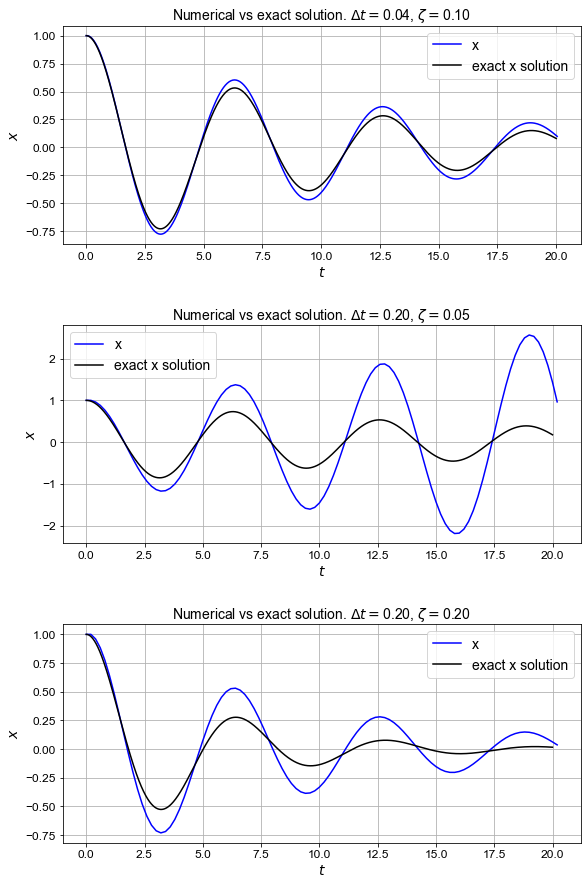

In [4]:
# Above looks good (NB. you should really do this more robustly and directly compare code outputs)

# Now check stability for different choices of parameters

# set up the plots - we know we want 4 frames
fig, axs = plt.subplots(3, 1, figsize=(8, 12))
fig.tight_layout(w_pad=5, h_pad=5)

tfine = np.arange(0, tf, dt/100)

# case 1 - should be stable
dt = 0.04
zeta = 0.1   

# initial condition
u0 = np.array([x0, v0])
uall, tall = forward_euler(f_msd, u0, t0, tf, dt)

# pull out the individual solution vectors (don't need to do this)
x = uall[:, 0]
v = uall[:, 1]

axs[0].plot(tall, x, 'b', label='x')
#axs[0].plot(tall, v, 'r', label='v')
axs[0].set_xlabel(r'$t$', fontsize=14)
axs[0].set_ylabel(r'$x$', fontsize=14)
axs[0].set_title('Numerical vs exact solution. $\Delta t =$%.2f, $\zeta=$%.2f' % (dt, zeta), fontsize=14)
axs[0].grid(True)
axs[0].plot(tfine, x_exact(tfine), 'k', label='exact x solution')
axs[0].legend(loc='best', fontsize=14)


# case 1 - should be unstable
dt = 0.2
zeta = 0.05  

# initial condition
u0 = np.array([x0, v0])
uall, tall = forward_euler(f_msd, u0, t0, tf, dt)

# pull out the individual solution vectors (don't need to do this)
x = uall[:, 0]
v = uall[:, 1]

axs[1].plot(tall, x, 'b', label='x')
#axs[1].plot(tall, v, 'r', label='v')
axs[1].set_xlabel(r'$t$', fontsize=14)
axs[1].set_ylabel(r'$x$', fontsize=14)
axs[1].set_title('Numerical vs exact solution. $\Delta t =$%.2f, $\zeta=$%.2f' % (dt, zeta), fontsize=14)
axs[1].grid(True)
axs[1].plot(tfine, x_exact(tfine), 'k', label='exact x solution')
axs[1].legend(loc='best', fontsize=14)


# case 3 - should be stable
dt = 0.2
zeta = 0.2 

# initial condition
u0 = np.array([x0, v0])
uall, tall = forward_euler(f_msd, u0, t0, tf, dt)

# pull out the individual solution vectors (don't need to do this)
x = uall[:, 0]
v = uall[:, 1]

axs[2].plot(tall, x, 'b', label='x')
#axs[2].plot(tall, v, 'r', label='v')
axs[2].set_xlabel(r'$t$', fontsize=14)
axs[2].set_ylabel(r'$x$', fontsize=14)
axs[2].set_title('Numerical vs exact solution. $\Delta t =$%.2f, $\zeta=$%.2f' % (dt, zeta), fontsize=14)
axs[2].grid(True)
axs[2].plot(tfine, x_exact(tfine), 'k', label='exact x solution')
axs[2].legend(loc='best', fontsize=14);   

## Homework - Implement improved Euler and compare with forward Euler

Consider the simple scalar equation

$$y'(t)=y,\;\;\; y(0)=1\,.$$

Implement the forward Euler and improved Euler schemes and use them to approximate solutions of this equation for different values of $\Delta t$. Plot the solutions over the time interval $[0, 2\pi]$.

Write a function `approx_error(f, y0, t0, t, h)` that returns the approximation error at a given time $t$ for both methods.

Using a while loop, compute the error at $t=3$ for $\Delta t$ from $1$ to $10^{-5}$, and plot it against $\Delta t$ in logarithmic scale.

Use `numpy.polyfit` to compute a line of best fit to the logs of the data and hence conclude the order of accuracy of both methods.

You should observe that improved Euler is much better than forward Euler - plot the error as a function of time (suggest you use a semilogy in matplotlib to get a log axis on the $y$ axis, but plot the $x$ (time) axis normally. 

See if you can get [`scipy.integrate.odeint`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html) working for this problem and see how its errors compare as a function of time - hint: take note of the order that odeint assumes the function $f$ takes the arguments $t$ and $y$, you can pass the argument `tfirst=True` to tell it to assume an order consistent with what convention we assume.

### Solution - Implement improved Euler and compare with forward Euler

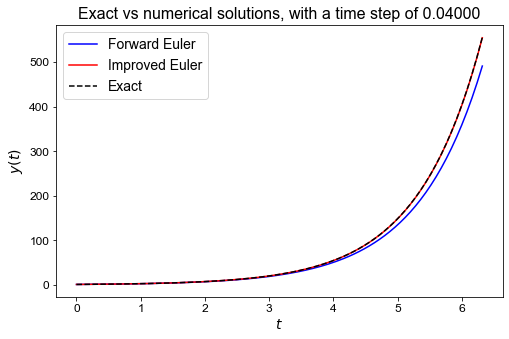

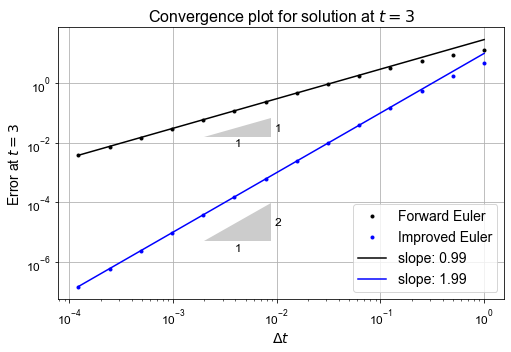

In [5]:
def forward_euler(f, y0, t0, t_max, dt):
    y = np.array(y0)
    t = np.array(t0)
    y_all = [y0]
    t_all = [t0]
    while t < t_max:
        y = y + dt*f(t, y)  # euler guess
        y_all.append(y)
        t = t + dt
        t_all.append(t)
    return np.array(y_all), np.array(t_all)

def improved_euler(f, y0, t0, t_max, dt):
    y = np.array(y0)
    t = np.array(t0)
    y_all = [y0]
    t_all = [t0]
    while t < t_max:
        ye = y + dt*f(t, y)  # euler guess
        y = y + 0.5*dt* ( f(t, y) + f(t + dt, ye) )
        y_all.append(y)
        t = t + dt
        t_all.append(t)
    return np.array(y_all), np.array(t_all)

def f(t, y):
    val = y
    return val

# problem parameters
dt = 0.04
y0 = 1.0
t0 = 0.0
tf = 2*np.pi

# set up figure
fig, ax1 = plt.subplots(1, 1, figsize=(8, 5))

yall, tall = forward_euler(f, y0, t0, tf, dt)
ax1.plot(tall, yall, 'b', label='Forward Euler')

yall, tall = improved_euler(f, y0, t0, tf, dt)
ax1.plot(tall, yall, 'r', label='Improved Euler')

ax1.plot(tall, np.exp(tall), 'k--', label='Exact')
ax1.set_xlabel('$t$', fontsize=14)
ax1.set_ylabel('$y(t)$', fontsize=14)
ax1.set_title('Exact vs numerical solutions, with a time step of {0:.5f}'.format(dt), fontsize=16)
ax1.legend(loc='best', fontsize=14)


def approx_error(dt, t_max):
    yall, tall = forward_euler(f, y0, t0, t_max, dt)
    err1 = abs(yall[-1]-np.exp(t_max))
    yall, tall = improved_euler(f, y0, t0, t_max, dt)
    err2 = abs(yall[-1]-np.exp(t_max))
    return err1, err2


error_fe = []
error_ie = []
dt_array = []
dt = 1
while dt > 1.e-4:
    dt_array.append(dt)
    err1, err2 = approx_error(dt, 3)
    error_fe.append(err1)
    error_ie.append(err2)
    dt *= 0.5

fig, ax1 = plt.subplots(1, 1, figsize=(8, 5))
ax1.loglog(dt_array, error_fe, 'k.', label='Forward Euler')
ax1.loglog(dt_array, error_ie, 'b.', label='Improved Euler')
ax1.set_xlabel('$\Delta t$', fontsize=14)
ax1.set_ylabel('Error at $t=3$', fontsize=14)
ax1.set_title('Convergence plot for solution at $t=3$', fontsize=16)
ax1.grid(True)
annotation.slope_marker((2e-3, 1.5e-2), (1, 1), ax=ax1, size_frac=0.15, pad_frac=0.05)
annotation.slope_marker((2e-3, 5e-6), (2, 1), ax=ax1, size_frac=0.15, pad_frac=0.05)

# use numpy.polyfit to find best fit linear line to data

# what does this parameter do, and what happens if you choose equal to a smaller value
start_fit = 4

line_fit_fe = np.polyfit(np.log(dt_array[start_fit:]), np.log(error_fe[start_fit:]), 1)
line_fit_ie = np.polyfit(np.log(dt_array[start_fit:]), np.log(error_ie[start_fit:]), 1)
ax1.loglog(dt_array, np.exp(line_fit_fe[1]) * dt_array**(line_fit_fe[0]), 'k-', label = 'slope: {:.2f}'.format(line_fit_fe[0]))
ax1.loglog(dt_array, np.exp(line_fit_ie[1]) * dt_array**(line_fit_ie[0]), 'b-', label = 'slope: {:.2f}'.format(line_fit_ie[0]))

ax1.legend(loc='best', fontsize=14);

So the convergence data and plots indicates that forward Euler is first-order accurate and improved Euler is second-order.

From the first plot above we see that we can't actually see any difference between the improved Euler numerical and the exact solution over the time interval considered.

Let's plot the error as a function of time and see how good this really is, but comparing with a call to an inbuilt SciPy solver.

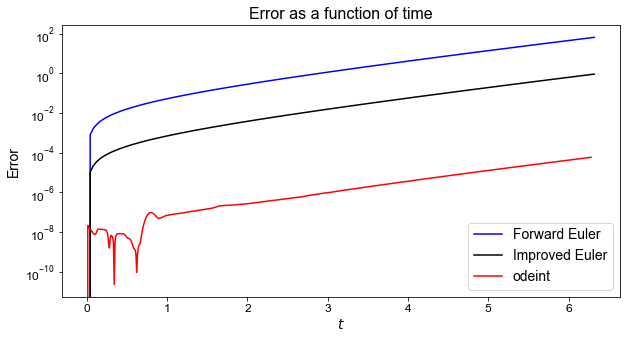

In [6]:
from scipy.integrate import odeint

# problem parameters
dt = 0.04
y0 = 1.0
t0 = 0.0
tf = 2*np.pi

def f(t, y):
    val = y
    return val

# note that odeint assumes the arguments to the function in the other order
def f2(y, t):
    val = y
    return val


# set up figure
fig, ax1 = plt.subplots(1, 1, figsize=(10, 5))

yall, tall = forward_euler(f, y0, t0, tf, dt)
ax1.semilogy(tall, np.abs(yall - np.exp(tall)), 'b', label='Forward Euler')

yall, tall = improved_euler(f, y0, t0, tf, dt)
ax1.semilogy(tall, np.abs(yall - np.exp(tall)), 'k', label='Improved Euler')

# these are the OUTPUT times we want odeint to tell us the solution at
t_odeint = np.arange(t0, tf, 0.01)
# solve using odeint
y_odeint = odeint(f2, y0, t_odeint) 
ax1.plot(t_odeint, np.abs(y_odeint[:,0] - np.exp(t_odeint)), 'r', label='odeint')

ax1.set_xlabel('$t$', fontsize=14)
ax1.set_ylabel('Error', fontsize=14)
ax1.set_title('Error as a function of time', fontsize=16)
ax1.legend(loc='best', fontsize=14);

So `odeint` has substantially lower errors than both of our methods!

We'll see why in the next lecture.

## Homework - Lorenz system

Recall the image at the beginning of the lecture.

The [Lorenz System](https://en.wikipedia.org/wiki/Lorenz_system "Lorenz system") comprises three coupled ODEs:

\begin{align*}
\frac{dx}{dt} &= \sigma (y - x), \\[5pt]
\frac{dy}{dt} &= x(\rho - z) - y, \\[5pt]
\frac{dz}{dt} &= x  y - \beta  z,
\end{align*}

where typical values of the parameters (for a chaotic solution) are $\rho = 28, \, \sigma = 10, \, \beta = 8/3$.

Use forward Euler and improved Euler solvers to plot a solution trajectory - do you see qualitative differences between your trajectories with the two solvers.

To check your answer (after you have attempted it please!), see [https://matplotlib.org/examples/mplot3d/lorenz_attractor.html](https://matplotlib.org/examples/mplot3d/lorenz_attractor.html).

See also [https://en.wikipedia.org/wiki/Lorenz_system#Python_simulation](https://en.wikipedia.org/wiki/Lorenz_system#Python_simulation) for a solution that uses scipy's odeint function. 


Now use your forward Euler and improved Euler solvers to compute and plot the growth in 'error' as a function of time, where here we are defining 'error' to be the difference compared to a solution obtained with `odeint`. 



### Solution - Lorenz system

Text(0.5, 0.92, 'Lorenz system computed with odeint')

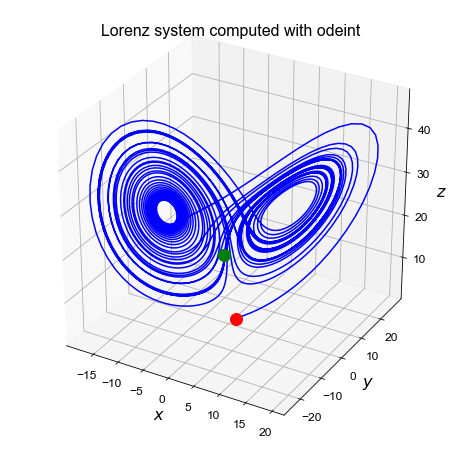

In [7]:
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import Axes3D

# problem parameters
rho = 28.0
sigma = 10.0
beta = 8.0 / 3.0

# RHS function - NOTE THAT if we have t as the first argument we need to tell
# odeint this using tfirst=True
def f(t, state):
    """ RHS function for Lorenz system
    """
    f = np.zeros_like(state)
    # unpack the state vector
    x, y, z = state  
    f[0] = sigma * (y - x)
    f[1] = x * (rho - z) - y
    f[2] = x * y - beta * z
    return f

# initial condition
state0 = np.array([1.0, 1.0, 1.0])

# times we want to get output from ODE solver, use same spacing as
# the dt we use on our own solvers
dt = 0.01
t = np.arange(0.0, 40.0, dt)

# solve using odeint
states = odeint(f, state0, t, tfirst=True)

fig = plt.figure(figsize=(8, 8))
ax1 = fig.add_subplot(1, 1, 1, projection='3d')
ax1.plot(states[:, 0], states[:, 1], states[:, 2], 'b')
ax1.plot( [states[0, 0]], [states[0, 1]], [states[0, 2]], 'ro', markersize=12)
ax1.plot( [states[-1, 0]], [states[-1, 1]], [states[-1, 2]], 'go', markersize=12)
ax1.set_xlabel('$x$', fontsize = 16)
ax1.set_ylabel('$y$', fontsize = 16)
ax1.set_zlabel('$z$', fontsize = 16)
ax1.set_title('Lorenz system computed with odeint', fontsize = 16)

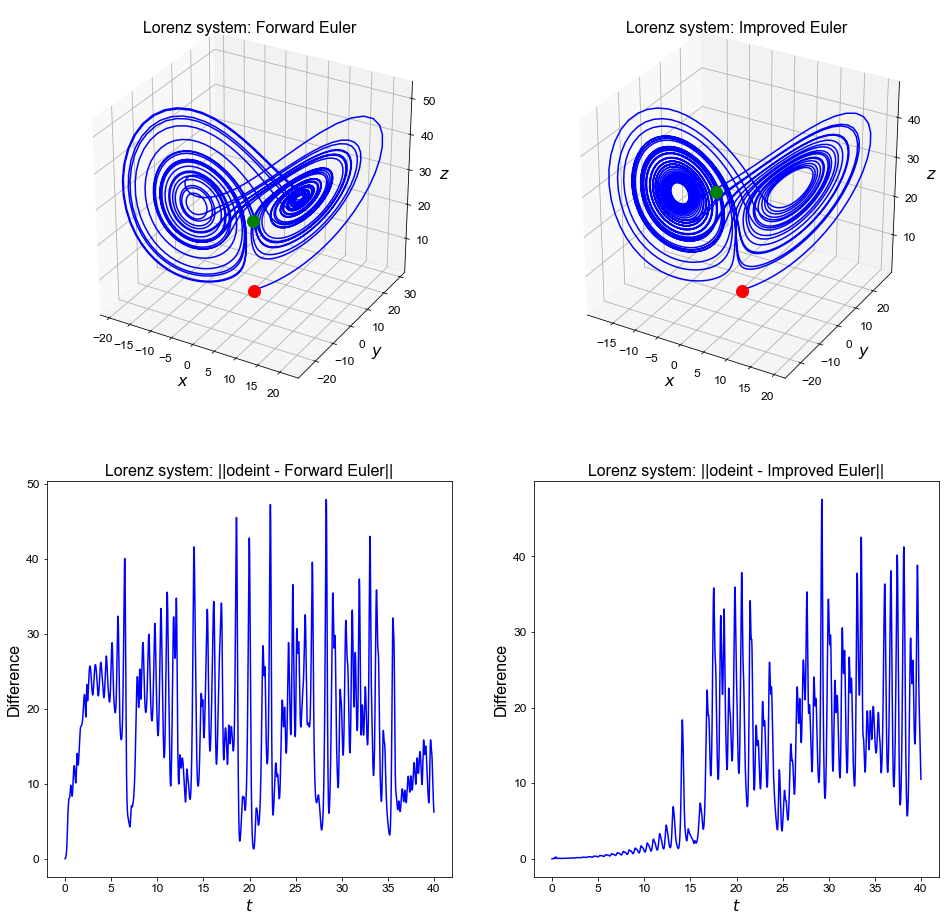

In [8]:
# let's test our own solver functions

def forward_euler(f, y0, t0, t_max, dt):
    y = np.array(y0)
    t = np.array(t0)
    y_all = [y0]
    t_all = [t0]
    while t < t_max:
        y = y + dt*f(t, y)  # euler guess
        y_all.append(y)
        t = t + dt
        t_all.append(t)
    return np.array(y_all), np.array(t_all)

def improved_euler(f, y0, t0, t_max, dt):
    y = np.array(y0)
    t = np.array(t0)
    y_all = [y0]
    t_all = [t0]
    while t < t_max:
        ye = y + dt*f(t, y)  # euler guess
        y = y + 0.5*dt* ( f(t, y) + f(t + dt, ye) )
        y_all.append(y)
        t = t + dt
        t_all.append(t)
    return np.array(y_all), np.array(t_all)

# initial condition
state0 = [1.0, 1.0, 1.0]

states_fe, t_fe = forward_euler(f, state0, 0., 40.0, 0.01)

states_ie, t_ie = improved_euler(f, state0 , 0., 40.0, 0.01)

fig = plt.figure(figsize=(16, 16))

ax1 = fig.add_subplot(2, 2, 1, projection='3d')
ax1.plot(states_fe[:, 0], states_fe[:, 1], states_fe[:, 2], 'b')
ax1.plot( [states_fe[0, 0]], [states_fe[0, 1]], [states_fe[0, 2]], 'ro', markersize=12)
ax1.plot( [states_fe[-1, 0]], [states_fe[-1, 1]], [states_fe[-1, 2]], 'go', markersize=12)
ax1.set_xlabel('$x$', fontsize = 16)
ax1.set_ylabel('$y$', fontsize = 16)
ax1.set_zlabel('$z$', fontsize = 16)
ax1.set_title('Lorenz system: Forward Euler', fontsize = 16)

ax1 = fig.add_subplot(2, 2, 3)

ax1.plot(t, np.linalg.norm(states - states_fe[:-1,:], axis=1), 'b')
ax1.set_xlabel('$t$', fontsize = 16)
ax1.set_ylabel('Difference', fontsize = 16)
ax1.set_title('Lorenz system: ||odeint - Forward Euler||', fontsize = 16)

ax1 = fig.add_subplot(2, 2, 2, projection='3d')

ax1.plot(states_ie[:, 0], states_ie[:, 1], states_ie[:, 2], 'b')
ax1.plot( [states_ie[0, 0]], [states_ie[0, 1]], [states_ie[0, 2]], 'ro', markersize=12)
ax1.plot( [states_ie[-1, 0]], [states_ie[-1, 1]], [states_ie[-1, 2]], 'go', markersize=12)
ax1.set_xlabel('$x$', fontsize = 16)
ax1.set_ylabel('$y$', fontsize = 16)
ax1.set_zlabel('$z$', fontsize = 16)
ax1.set_title('Lorenz system: Improved Euler', fontsize = 16)

ax1 = fig.add_subplot(2, 2, 4)

ax1.plot(t, np.linalg.norm(states - states_ie[:-1,:], axis=1), 'b')
ax1.set_xlabel('$t$', fontsize = 16)
ax1.set_ylabel('Difference', fontsize = 16)
ax1.set_title(r'Lorenz system: ||odeint - Improved Euler||', fontsize = 16);

Note that the improved Euler solution stays close to the `odeint` solution for far longer at the start, both of our simple solvers ultimately diverge from this (itself approximate) solution, but then due to the constrained nature of the Lorenz orbits the errors are constrained in magnitude.

<div class="optional">
    
## Homework - Circular orbits [$\star$]

Consider the coupled problem

\begin{align*}
\dot{x} & = -y, \\[5pt] 
\dot{y} & = x,
\end{align*} 

with initial conditions 

$$ x(0)=1,\;\;\;\; y(0)=0. $$

We expect the solution (trajectory) to form a closed circle (why?  think simple harmonic motion).

Solve this problem using forward Euler and Improved Euler and simulate several orbits, plotting the result in $(x,y)$ space. 

What do you observe about the qualitative solution behaviour?

</div>

### Solution - Circular orbits

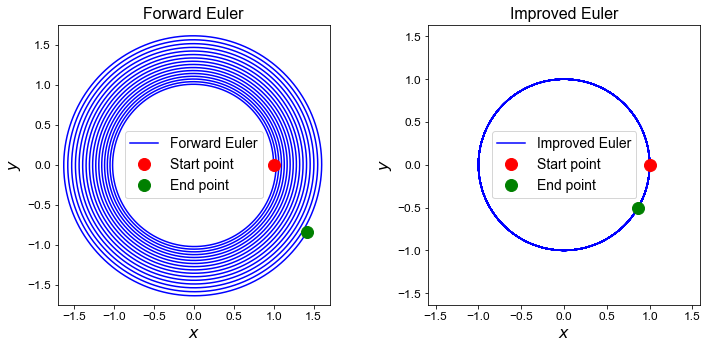

In [9]:
# let's use the notation u = (x,y) here

def f(t, u): 
    f = np.zeros_like(u)
    f[0] = -u[1]
    f[1] =  u[0]   
    return f

# problem parameters
dt = 0.01
u0 = np.array([1.,0.])
t0 = 0.0
tf = 100.

# set up figure
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

u, t = forward_euler(f, u0, t0, tf, dt)
ax1.plot(u[:,0], u[:,1], 'b', label='Forward Euler')
ax1.plot(u[0,0], u[0,1], 'ro', label='Start point', markersize=12)
ax1.plot(u[-1,0], u[-1,1], 'go', label='End point', markersize=12)
ax1.set_xlabel('$x$', fontsize=16)
ax1.set_ylabel('$y$', fontsize=16)
ax1.set_title('Forward Euler', fontsize=16)
ax1.axis('equal')
ax1.legend(loc='best', fontsize=14)
ax1.set_xlim(-1.7,1.7)
ax1.set_ylim(-1.7,1.7)

u0 = np.array([1.,0.])
t0 = 0.0
u, t = improved_euler(f, u0, t0, tf, dt)
ax2.plot(u[:,0], u[:,1], 'b', label='Improved Euler')
ax2.plot(u[0,0], u[0,1], 'ro', label='Start point', markersize=12)
ax2.plot(u[-1,0], u[-1,1], 'go', label='End point', markersize=12)
ax2.set_xlabel('$x$', fontsize=16)
ax2.set_ylabel('$y$', fontsize=16)
ax2.set_title('Improved Euler', fontsize=16)
ax2.axis('equal')
ax2.legend(loc='best', fontsize=14)
ax2.set_xlim(-1.7,1.7)
ax2.set_ylim(-1.7,1.7);

fig.tight_layout(w_pad=4)
#fig.savefig('circular_orbits_trajectories.png', dpi=600, format='png', facecolor='w', edgecolor='w')

Well FE clearly does not form a closed circle, IE looks like it may. We can check this by plotting the "conservation law" 

$$ r(t) := \sqrt{x(t)^2 + y(t)^2} = r(0), $$

in time.

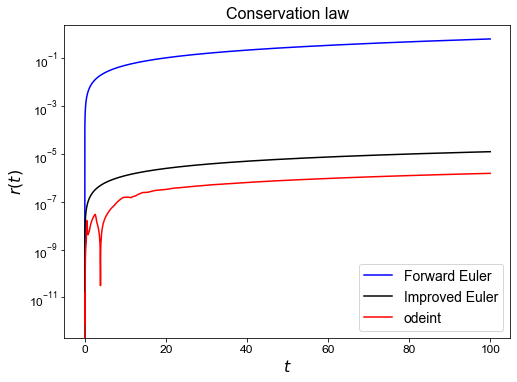

In [10]:
# set up figure
fig, ax1 = plt.subplots(1, 1, figsize=(7, 5))
fig.tight_layout(w_pad=4)
ax1.set_xlabel('$t$', fontsize=16)
ax1.set_ylabel('$r(t)$', fontsize=16)
ax1.set_title('Conservation law', fontsize=16)

def f(t, u): 
    f = np.zeros_like(u)
    f[0] = -u[1]
    f[1] =  u[0]   
    return f

u, t = forward_euler(f, u0, t0, tf, dt)
ax1.semilogy(t, np.abs(np.sqrt(u[:,0]**2 + u[:,1]**2) - np.sqrt(u[0,0]**2 + u[0,1]**2)), 'b', label='Forward Euler')

u, t = improved_euler(f, u0, t0, tf, dt)
ax1.semilogy(t, np.abs(np.sqrt(u[:,0]**2 + u[:,1]**2) - np.sqrt(u[0,0]**2 + u[0,1]**2)), 'k', label='Improved Euler')

# add in odeint solution

# initial condition
state0 = np.array([1.0, 1.0, 1.0])

t = np.arange(t0, tf, dt)
# solve using odeint
u = odeint(f, u0, t, tfirst=True)
ax1.semilogy(t, np.abs(np.sqrt(u[:,0]**2 + u[:,1]**2) - np.sqrt(u[0,0]**2 + u[0,1]**2)), 'r', label='odeint')

ax1.legend(loc='best', fontsize=14);

<div class="advanced">

## Homework - Planetary motion (the two-body problem or Kepler's problem)  [$\star\star$]


See here for an interesting paper on the use of ODE solvers to model the solar system which is then used to find the location of Neptune: <http://www.diva-portal.org/smash/get/diva2:1218549/FULLTEXT01.pdf>, and establish the chaotic nature of the solar system: <http://science.sciencemag.org/content/257/5066/56/tab-pdf>

See also <https://www.annualreviews.org/doi/pdf/10.1146/annurev.earth.30.091201.140243>


Consider the problem of two bodies attracting one another under the force of gravity. Choose one of the bodies as the centre of our frame of reference (think of this body as a star).  Then the motion of the second body (think of a planet or a comet) will be restricted to a two-dimensional plane and it common to denote the coordinate of its position using the notation $\boldsymbol{q}=(q_1,q_2)^T$.

By Newton's second law we can link the acceleration of the second body to the force (per unit mass) experienced on that body due to gravity:

$$\ddot{\boldsymbol{q}} = -\frac{K}{\|\boldsymbol{q}\|^2}\frac{\boldsymbol{q}}{\|\boldsymbol{q}\|}, $$

where $K$ is the product of the star's mass and the gravitational constant. The division by $\|\boldsymbol{q}\|^2$ emphasises that this is an ['inverse square law'](https://en.wikipedia.org/wiki/Inverse-square_law) problem; the ${q}/{\|\boldsymbol{q}\|}$ term is a normalised direction, and the minus sign is due to this being a force of attraction.

With a suitable nondimensionalisation of the problem we can actually just consider the ODE

$$\ddot{\boldsymbol{q}} = -\frac{\boldsymbol{q}}{\|\boldsymbol{q}\|^3}, $$

or written out in full

\begin{align*}
\ddot{q_1} &= -\frac{q_1}{(q_1^2 + q_2^2)^{3/2}},\\[5pt]
\ddot{q_2} &= -\frac{q_2}{(q_1^2 + q_2^2)^{3/2}}. 
\end{align*}

We can turn this into the first-order system

\begin{align*}
\dot{q_1} &= p_1,\\[5pt]
\dot{q_2} &= p_2,\\[5pt]
\dot{p_1} &= -\frac{q_1}{(q_1^2 + q_2^2)^{3/2}},\\[5pt]
\dot{p_2} &= -\frac{q_2}{(q_1^2 + q_2^2)^{3/2}}. 
\end{align*}


For an orbit with eccentricity $e \in [0,1)$ we can use initial conditions

\begin{align*}
q_1(0) &= 1 - e, \\[5pt]
q_2(0) &= 0, \\[5pt]
p_1(0) &= 0, \\[5pt]
q_2(0) &= \left(\frac{1 + e}{1 - e}\right)^{1/2}.
\end{align*}

With an eccentricity of zero we revert back to the circular orbit case above. With $e$ closer to 1 we get a more eccentric orbit.

The period of an orbit should be $2\pi$. Simulate this problem for 10 periods using forward and improved Euler and see what orbits you get. Suggest you test the eccentricity values 0.5 and 0.9.

In this problem total energy (kinetic plus potential) should be conserved. Here this is given by

$$H := \frac{1}{2}\|\boldsymbol{p}\|^2 - \frac{1}{\|\boldsymbol{q}\|}.$$

Another conserved quantity is the angular momentum defined as

$$L := q_1p_2 - q_2p_1. $$

Compute and plot these for your solution and see how well this quantity is conserved by our solvers.

</div>

### Solution - Planetary motion (the two-body problem or Kepler's problem)

First we consider an easier eccentricity 0.5 case, then a more challenging eccentricity 0.9 case.

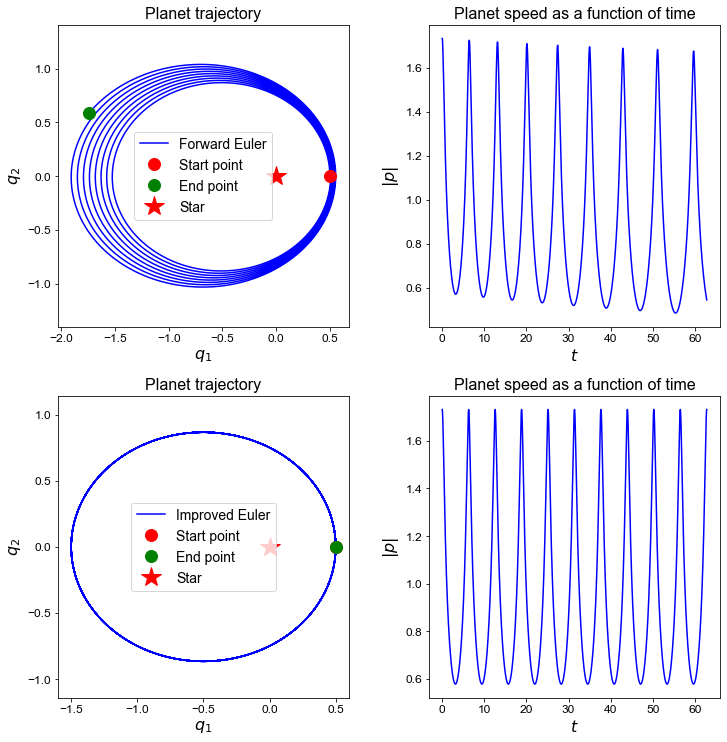

In [11]:
# ecc = 0.5 case

def f_planetary(t, y):
    """ RHS function for orbital motion example.
    y = (q_1,q_2, p_1,p_1)
    The q's are the position coordinates
    and the p's are the velocity components.
    """
    f = np.zeros_like(y)
    r = np.sqrt(y[0]**2 + y[1]**2)
    f[0] = y[2]
    f[1] = y[3]
    f[2] = -y[0] / r**3 
    f[3] = -y[1] / r**3  
    return f


# Initial conditions
ecc = 0.5
y0 = np.array([1. - ecc, 0., 0., np.sqrt( (1.+ecc) / (1.-ecc))])

# problem parameters
dt = 0.001
t0 = 0.0
# period should be 2 pi
tf = 10. * 2. * np.pi

# set up figure
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
fig.tight_layout(w_pad=4, h_pad=4)
# reshape the list of axes as we are going to use in a loop
ax = axs.reshape(-1)

y, t = forward_euler(f_planetary, y0, t0, tf, dt)

ax[0].plot(y[:,0], y[:,1], 'b', label='Forward Euler')
ax[0].plot(y[0,0], y[0,1], 'ro', label='Start point', markersize=12)
ax[0].plot(y[-1,0], y[-1,1], 'go', label='End point', markersize=12)
ax[0].plot(0,0,'r*',label = 'Star', markersize=20)
ax[0].set_xlabel('$q_1$', fontsize=16)
ax[0].set_ylabel('$q_2$', fontsize=16)
ax[0].set_title('Planet trajectory', fontsize=16)
ax[0].axis('equal')
ax[0].legend(loc='best', fontsize=14)

ax[1].plot(t, np.sqrt( y[:,2]**2 + y[:,3]**2) ,'b')
ax[1].set_xlabel('$t$', fontsize=16)
ax[1].set_ylabel('$|p|$', fontsize=16)
ax[1].set_title('Planet speed as a function of time', fontsize=16)

y, t = improved_euler(f_planetary, y0, t0, tf, dt)

ax[2].plot(y[:,0], y[:,1], 'b', label='Improved Euler')
ax[2].plot(y[0,0], y[0,1], 'ro', label='Start point', markersize=12)
ax[2].plot(y[-1,0], y[-1,1], 'go', label='End point', markersize=12)
ax[2].plot(0,0,'r*',label = 'Star', markersize=20)
ax[2].set_xlabel('$q_1$', fontsize=16)
ax[2].set_ylabel('$q_2$', fontsize=16)
ax[2].set_title('Planet trajectory', fontsize=16)
ax[2].axis('equal')
ax[2].legend(loc='best', fontsize=14)

ax[3].plot(t, np.sqrt( y[:,2]**2 + y[:,3]**2) ,'b')
ax[3].set_xlabel('$t$', fontsize=16)
ax[3].set_ylabel('$|p|$', fontsize=16)
ax[3].set_title('Planet speed as a function of time', fontsize=16);

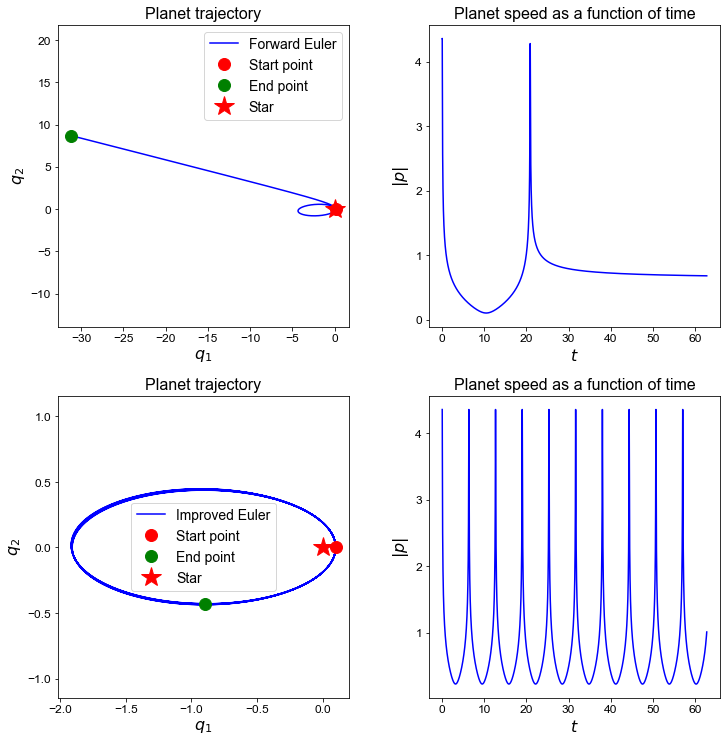

In [12]:
# ecc = 0.9 case

def f_planetary(t, y):
    """ RHS function for orbital motion example.
    y = (q_1,q_2, p_1,p_1)
    The q's are the position coordinates
    and the p's are the velocity components.
    """
    f = np.zeros_like(y)
    r = np.sqrt(y[0]**2 + y[1]**2)
    f[0] = y[2]
    f[1] = y[3]
    f[2] = -y[0] / r**3 
    f[3] = -y[1] / r**3  
    return f


# Initial conditions
ecc = 0.9
y0 = np.array([1. - ecc, 0., 0., np.sqrt( (1.+ecc) / (1.-ecc))])

# problem parameters
dt = 0.001
t0 = 0.0
# period should be 2 pi
tf = 10. * 2. * np.pi

# set up figure
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
fig.tight_layout(w_pad=4, h_pad=4)
# reshape the list of axes as we are going to use in a loop
ax = axs.reshape(-1)

y, t = forward_euler(f_planetary, y0, t0, tf, dt)

ax[0].plot(y[:,0], y[:,1], 'b', label='Forward Euler')
ax[0].plot(y[0,0], y[0,1], 'ro', label='Start point', markersize=12)
ax[0].plot(y[-1,0], y[-1,1], 'go', label='End point', markersize=12)
ax[0].plot(0,0,'r*',label = 'Star', markersize=20)
ax[0].set_xlabel('$q_1$', fontsize=16)
ax[0].set_ylabel('$q_2$', fontsize=16)
ax[0].set_title('Planet trajectory', fontsize=16)
ax[0].axis('equal')
ax[0].legend(loc='best', fontsize=14)

ax[1].plot(t, np.sqrt( y[:,2]**2 + y[:,3]**2) ,'b')
ax[1].set_xlabel('$t$', fontsize=16)
ax[1].set_ylabel('$|p|$', fontsize=16)
ax[1].set_title('Planet speed as a function of time', fontsize=16)

y, t = improved_euler(f_planetary, y0, t0, tf, dt)

ax[2].plot(y[:,0], y[:,1], 'b', label='Improved Euler')
ax[2].plot(y[0,0], y[0,1], 'ro', label='Start point', markersize=12)
ax[2].plot(y[-1,0], y[-1,1], 'go', label='End point', markersize=12)
ax[2].plot(0,0,'r*',label = 'Star', markersize=20)
ax[2].set_xlabel('$q_1$', fontsize=16)
ax[2].set_ylabel('$q_2$', fontsize=16)
ax[2].set_title('Planet trajectory', fontsize=16)
ax[2].axis('equal')
ax[2].legend(loc='best', fontsize=14)

ax[3].plot(t, np.sqrt( y[:,2]**2 + y[:,3]**2) ,'b')
ax[3].set_xlabel('$t$', fontsize=16)
ax[3].set_ylabel('$|p|$', fontsize=16)

ax[3].set_title('Planet speed as a function of time', fontsize=16);

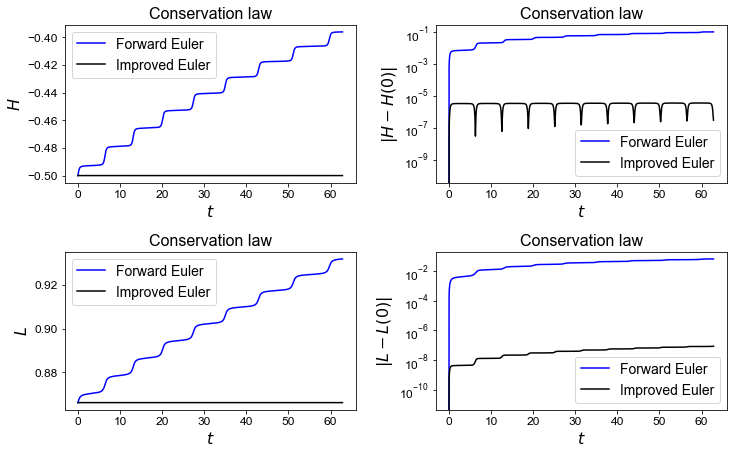

In [13]:
# now check whether the numerical methods respect the conservation laws

ecc = 0.5


def compute_Kepler_energy(y):
    H = 0.5 * (y[:,2]**2 + y[:,3]**2) - 1. / np.sqrt( y[:,0]**2 + (y[:,1]**2) )
    return H

def compute_Kepler_angular_mom(y):
    L = y[:,0]*y[:,3] - y[:,1]*y[:,2]
    return L

# Initial conditions
y0 = np.array([1. - ecc, 0., 0., np.sqrt( (1.+ecc) / (1.-ecc))])

# problem parameters
dt = 0.001
t0 = 0.0
# period should be 2 pi
tf = 10. * 2. * np.pi
               
y_fe, t_fe = forward_euler(f_planetary, y0, t0, tf, dt)
H_fe = compute_Kepler_energy(y_fe)
L_fe = compute_Kepler_angular_mom(y_fe)

y_ie, t_ie = improved_euler(f_planetary, y0, t0, tf, dt)
H_ie = compute_Kepler_energy(y_ie)
L_ie = compute_Kepler_angular_mom(y_ie)

# set up figure
fig, axs = plt.subplots(2, 2, figsize=(10, 6))
fig.tight_layout(w_pad=4, h_pad=4)
# reshape the list of axes as we are going to use in a loop
ax = axs.reshape(-1)

ax[0].plot(t_fe, H_fe, 'b', label='Forward Euler')
ax[0].plot(t_ie, H_ie, 'k', label='Improved Euler')
ax[0].set_xlabel('$t$', fontsize=16)
ax[0].set_ylabel('$H$', fontsize=16)
ax[0].set_title('Conservation law', fontsize=16)
ax[0].legend(loc='best', fontsize=14)

# a semilogy plot
ax[1].semilogy(t_fe, np.abs(H_fe - H_fe[0]), 'b', label='Forward Euler')
ax[1].semilogy(t_ie, np.abs(H_ie - H_ie[0]), 'k', label='Improved Euler')
ax[1].set_xlabel('$t$', fontsize=16)
ax[1].set_ylabel('$|H - H(0)|$', fontsize=16)
ax[1].set_title('Conservation law', fontsize=16)
ax[1].legend(loc='best', fontsize=14)

ax[2].plot(t_fe, L_fe, 'b', label='Forward Euler')
ax[2].plot(t_ie, L_ie, 'k', label='Improved Euler')
ax[2].set_xlabel('$t$', fontsize=16)
ax[2].set_ylabel('$L$', fontsize=16)
ax[2].set_title('Conservation law', fontsize=16)
ax[2].legend(loc='best', fontsize=14)

# a semilogy plot
ax[3].semilogy(t_fe, np.abs(L_fe - L_fe[0]), 'b', label='Forward Euler')
ax[3].semilogy(t_ie, np.abs(L_ie - L_ie[0]), 'k', label='Improved Euler')
ax[3].set_xlabel('$t$', fontsize=16)
ax[3].set_ylabel('$|L - L(0)|$', fontsize=16)
ax[3].set_title('Conservation law', fontsize=16)
ax[3].legend(loc='best', fontsize=14)

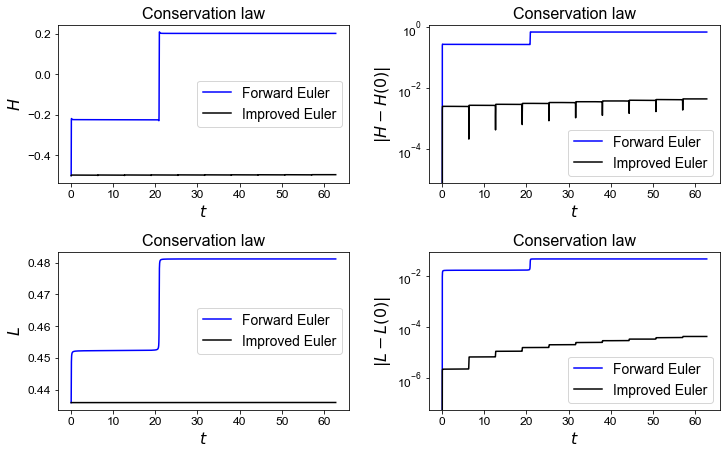

In [14]:
ecc = 0.9


def compute_Kepler_energy(y):
    H = 0.5 * (y[:,2]**2 + y[:,3]**2) - 1. / np.sqrt( y[:,0]**2 + (y[:,1]**2) )
    return H

def compute_Kepler_angular_mom(y):
    L = y[:,0]*y[:,3] - y[:,1]*y[:,2]
    return L

# Initial conditions
y0 = np.array([1. - ecc, 0., 0., np.sqrt( (1.+ecc) / (1.-ecc))])

# problem parameters
dt = 0.001
t0 = 0.0
# period should be 2 pi
tf = 10. * 2. * np.pi
               
y_fe, t_fe = forward_euler(f_planetary, y0, t0, tf, dt)
H_fe = compute_Kepler_energy(y_fe)
L_fe = compute_Kepler_angular_mom(y_fe)

y_ie, t_ie = improved_euler(f_planetary, y0, t0, tf, dt)
H_ie = compute_Kepler_energy(y_ie)
L_ie = compute_Kepler_angular_mom(y_ie)

# set up figure
fig, axs = plt.subplots(2, 2, figsize=(10, 6))
fig.tight_layout(w_pad=4, h_pad=4)
# reshape the list of axes as we are going to use in a loop
ax = axs.reshape(-1)

ax[0].plot(t_fe, H_fe, 'b', label='Forward Euler')
ax[0].plot(t_ie, H_ie, 'k', label='Improved Euler')
ax[0].set_xlabel('$t$', fontsize=16)
ax[0].set_ylabel('$H$', fontsize=16)
ax[0].set_title('Conservation law', fontsize=16)
ax[0].legend(loc='best', fontsize=14)

# a semilogy plot
ax[1].semilogy(t_fe, np.abs(H_fe - H_fe[0]), 'b', label='Forward Euler')
ax[1].semilogy(t_ie, np.abs(H_ie - H_ie[0]), 'k', label='Improved Euler')
ax[1].set_xlabel('$t$', fontsize=16)
ax[1].set_ylabel('$|H - H(0)|$', fontsize=16)
ax[1].set_title('Conservation law', fontsize=16)
ax[1].legend(loc='best', fontsize=14)

ax[2].plot(t_fe, L_fe, 'b', label='Forward Euler')
ax[2].plot(t_ie, L_ie, 'k', label='Improved Euler')
ax[2].set_xlabel('$t$', fontsize=16)
ax[2].set_ylabel('$L$', fontsize=16)
ax[2].set_title('Conservation law', fontsize=16)
ax[2].legend(loc='best', fontsize=14)

# a semilogy plot
ax[3].semilogy(t_fe, np.abs(L_fe - L_fe[0]), 'b', label='Forward Euler')
ax[3].semilogy(t_ie, np.abs(L_ie - L_ie[0]), 'k', label='Improved Euler')
ax[3].set_xlabel('$t$', fontsize=16)
ax[3].set_ylabel('$|L - L(0)|$', fontsize=16)
ax[3].set_title('Conservation law', fontsize=16)
ax[3].legend(loc='best', fontsize=14);

<div class="advanced">

## Homework - A ballistics example (the shooting method)  [$\star\star$]

Take a look at

https://www.wired.com/2009/09/how-high-does-a-bullet-go/

Suppose we fire a gun pointing straight up, assuming the bullet hits the ground 60 seconds later, how fast must it have been travelling when it left the gun?

To solve this problem write an ODE solver to solve the problem

$$ \ddot{x} = -g, $$

where $x$ here represents the height of the bullet as a function of time (so $\ddot{x}$ is the bullet's acceleration), and $g$ is acceleration due to gravity. Your first task will be to turn this into a system of first order ODEs.

I suggest you try using the SciPy solver [`scipy.integrate.solve_ivp`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html) this time, and use it to integrate from time zero to 60s.  We want the bullet to be at a height of zero again at the final time.

We are given the initial location of the bullet ($x(0)=0$), but not its initial velocity ($\dot{x}(0)=$?). 

Starting from upper and lower guesses for the possible initial velocity of the bullet, 
use a bisection algorithm (lecture 4) to iterate towards the solution we desire (i.e. the initial velocity that means the bullet returns to the ground after 60s ($x(60)=0$).

*Hint:* I make the answer 293 m/s.

Note this is an example of a shooting method - rather than two initial conditions (for position and velocity) specified at the initial time, we are given two positions at two different times and our job is to find the missing initial condition (here the initial velocity).

Note that you could extend this problem to add air resistance, and also turn this into a projectile problem where $t$ is replaced as the independent variable by horizontal distance $x$, and our job is to hit a target a certain distance away - what angle should we fire at?  

If you're interested take a look at the MythBusters episode the above Wired article is motivated by.
    
</div>

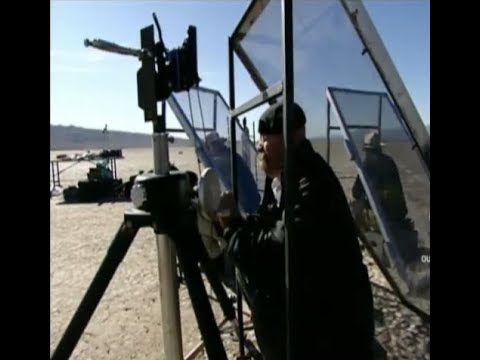

In [15]:
from IPython.display import YouTubeVideo
YouTubeVideo('pEKuQdcgMHs')

### Solution - A ballistics example (the shooting method)

Bullet fired at velocity 294.29998792 m/s arrives back at ground after 60 seconds and reached a maximum height of 4414.04922792 metres


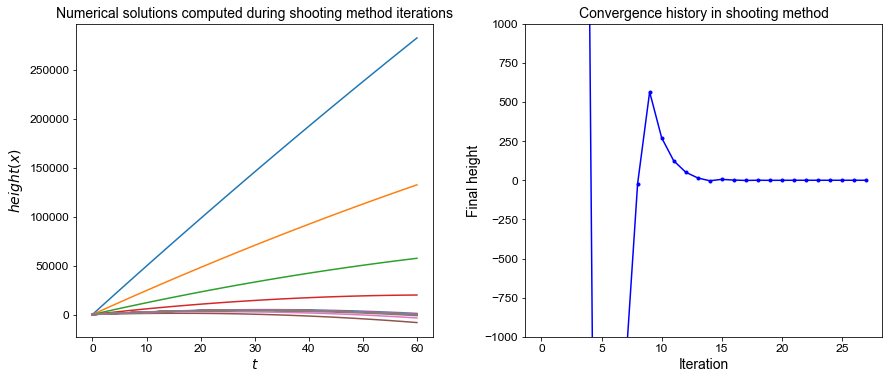

In [16]:
import scipy.integrate as si

# Define some stopping criteria
# how accurately we want to achieve the right hand BC
tol = 1.e-3
# but set an upper limit on how many iterations we will allow
max_its = 100

# physical parameters defining problem
g = 9.81


def shooting_f(t, u):
    """ The RHS function for our coupled first-order ODE system
    coming from ballistics problem
    
    u = [x, y], with x the height and y the velocity
    
    Our second order ODE 
    x'' = -g 
    
    is equivalent to the first order ODE system 
    x' = y
    y' = -g
    """
    return np.array([u[1], -g])


# we will always be integrating over the same independent variable range
# define a series of points to be returned for plotting purposes, we will
# pass the first and last values of this to the integrator as the range to
# integrate over.
iv_range = np.linspace(0.0, 60.0, 100)

# give the initial guess in the form of upper and lower bounds
vel_1 = 1.0
vel_2 = 1.0e4

# solve the problem for these two guesses
sol_1 = si.solve_ivp(shooting_f, [iv_range[0], iv_range[-1]],
                     np.array([0.0, vel_1]), method='RK45', t_eval=iv_range)
# our final height is the the final entry in the first column
height_1 = sol_1.y[0][-1]

sol_2 = si.solve_ivp(shooting_f, [iv_range[0], iv_range[-1]],
                     np.array([0.0, vel_2]), method='RK45', t_eval=iv_range)
# our final height is the the final entry in the first column
height_2 = sol_2.y[0][-1]

# now iterate until convergence using the bisection method
for it in range(max_its):
    vel_mid = (vel_1 + vel_2) / 2
    sol_mid = si.solve_ivp(shooting_f, [
                           iv_range[0], iv_range[-1]], np.array([0.0, vel_mid]), method='RK45', t_eval=iv_range)
    height_mid = sol_mid.y[0][-1]
    if it == 0:
        conv_history = height_mid
        sol_history = sol_mid.y[0]
    else:
        conv_history = np.append(conv_history, height_mid)
        # store this numerical solution for plotting purposes - just the first component
        sol_history = np.vstack((sol_history, sol_mid.y[0]))
        # check for convergence
        if np.fabs(height_mid) < tol:
            break
    # update the interval using the bisection algorithm
    if height_1 * height_mid > 0:
        vel_1 = vel_mid
        height_1 = height_mid
    else:
        vel_2 = vel_mid
        height_2 = height_mid


print('Bullet fired at velocity {0:.8f} m/s arrives back at ground after'
      ' 60 seconds and reached a maximum height of {1:.8f} metres'.format(vel_mid,np.amax(sol_mid.y[0])))

# set up our figs for plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
fig.tight_layout(w_pad=5)  # add some padding otherwise axes labels overlap

# plot numerical solution from iterations
for it in range(np.shape(sol_history)[0]):
    ax1.plot(iv_range, sol_history[it, :])

ax1.set_xlabel('$t$', fontsize=14)
ax1.set_ylabel('$height(x)$', fontsize=14)
ax1.set_title('Numerical solutions computed during shooting method iterations', fontsize=14)

ax2.plot(conv_history, 'b.-')
ax2.set_ylim([-1000, 1000])
ax2.set_xlabel('Iteration', fontsize=14)
ax2.set_ylabel('Final height', fontsize=14)
ax2.set_title('Convergence history in shooting method', fontsize=14);

Bullet fired at velocity 294.29998398 m/s arrives back at ground after 60 seconds and reached a maximum height of 4414.04911098 metres


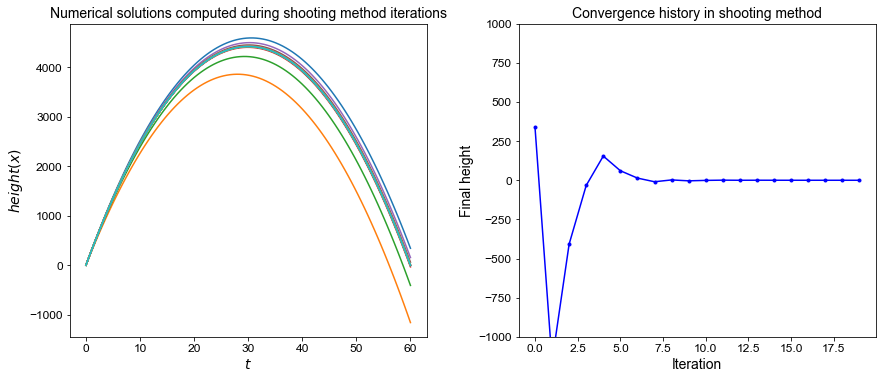

In [17]:
# start from two more sensible guesses simply to give a final plot
# showing trajectories that may make a bit more sense 

# give the initial guess in the form of upper and lower bounds
vel_1 = 350.0
vel_2 = 250.0


# Define some stopping criteria
# how accurately we want to achieve the right hand BC
tol = 1.e-3
# but set an upper limit on how many iterations we will allow
max_its = 100

# physical parameters defining problem
g = 9.81


def shooting_f(t, u):
    """ The RHS function for our coupled first-order ODE system
    coming from ballistics problem
    
    u = [x, y], with x the height and y the velocity
    
    Our second order ODE 
    x'' = -g 
    
    is equivalent to the first order ODE system 
    x' = y
    y' = -g
    """
    return np.array([u[1], -g])


# we will always be integrating over the same independent variable range
# define a series of points to be returned for plotting purposes, we will
# pass the first and last values of this to the integrator as the range to
# integrate over.
iv_range = np.linspace(0.0, 60.0, 100)


# solve the problem for these two guesses
sol_1 = si.solve_ivp(shooting_f, [iv_range[0], iv_range[-1]],
                     np.array([0.0, vel_1]), method='RK45', t_eval=iv_range)
# our final height is the the final entry in the first column
height_1 = sol_1.y[0][-1]

sol_2 = si.solve_ivp(shooting_f, [iv_range[0], iv_range[-1]],
                     np.array([0.0, vel_2]), method='RK45', t_eval=iv_range)
# our final height is the the final entry in the first column
height_2 = sol_2.y[0][-1]

# now iterate until convergence using the bisection method
for it in range(max_its):
    vel_mid = (vel_1 + vel_2) / 2
    sol_mid = si.solve_ivp(shooting_f, [
                           iv_range[0], iv_range[-1]], np.array([0.0, vel_mid]), method='RK45', t_eval=iv_range)
    height_mid = sol_mid.y[0][-1]
    if it == 0:
        conv_history = height_mid
        sol_history = sol_mid.y[0]
    else:
        conv_history = np.append(conv_history, height_mid)
        # store this numerical solution for plotting purposes - just the first component
        sol_history = np.vstack((sol_history, sol_mid.y[0]))
        # check for convergence
        if np.fabs(height_mid) < tol:
            break
    # update the interval using the bisection algorithm
    if height_1 * height_mid > 0:
        vel_1 = vel_mid
        height_1 = height_mid
    else:
        vel_2 = vel_mid
        height_2 = height_mid


print('Bullet fired at velocity {0:.8f} m/s arrives back at ground after'
      ' 60 seconds and reached a maximum height of {1:.8f} metres'.format(vel_mid,np.amax(sol_mid.y[0])))

# set up our figs for plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
fig.tight_layout(w_pad=5)  # add some padding otherwise axes labels overlap

# plot numerical solution from iterations
for it in range(np.shape(sol_history)[0]):
    ax1.plot(iv_range, sol_history[it, :])

ax1.set_xlabel('$t$', fontsize=14)
ax1.set_ylabel('$height(x)$', fontsize=14)
ax1.set_title('Numerical solutions computed during shooting method iterations', fontsize=14)

ax2.plot(conv_history, 'b.-')
ax2.set_ylim([-1000, 1000])
ax2.set_xlabel('Iteration', fontsize=14)
ax2.set_ylabel('Final height', fontsize=14)
ax2.set_title('Convergence history in shooting method', fontsize=14);